In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
#Analyzing Data Science Job Demand
df_us = df[df['job_country'] == 'United States'].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot=df_us.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc='size')
df_us_pivot.reset_index(inplace=True)

<Axes: xlabel='job_posted_month'>

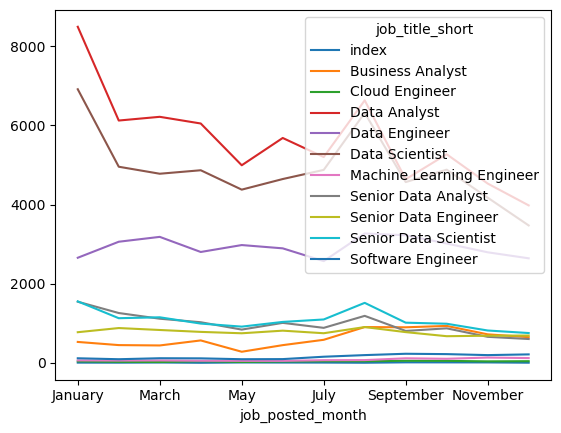

In [9]:
df_us_pivot = df_us_pivot.reset_index()
df_us_pivot['job_posted_month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot = df_us_pivot.sort_values('job_posted_month_no')
df_us_pivot = df_us_pivot.set_index('job_posted_month')
df_us_pivot = df_us_pivot.drop(columns='job_posted_month_no')

df_us_pivot.plot(kind='line')


In [13]:
#merging another table containing Software Development jobs demand per month with our previous table.
us_pivot_software = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_merged=df_us_pivot.merge(us_pivot_software, on='job_posted_month')

<Axes: xlabel='job_posted_month'>

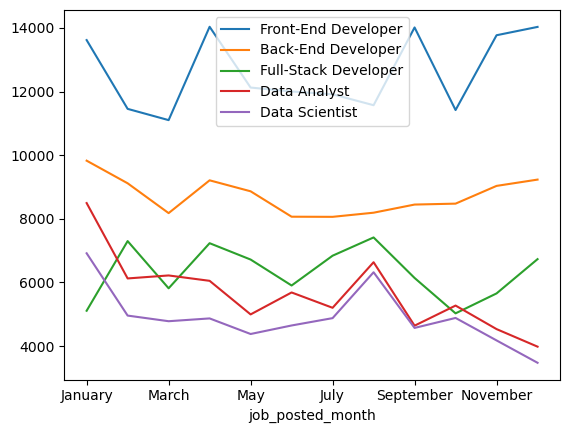

In [17]:
top5jobs=df_merged.sum().sort_values(ascending=False).head().index.to_list()
df_merged[top5jobs].plot(kind='line')